In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install -U scikit-learn

In [ ]:
data = pd.read_csv("/content/mhealth_raw_data.csv")

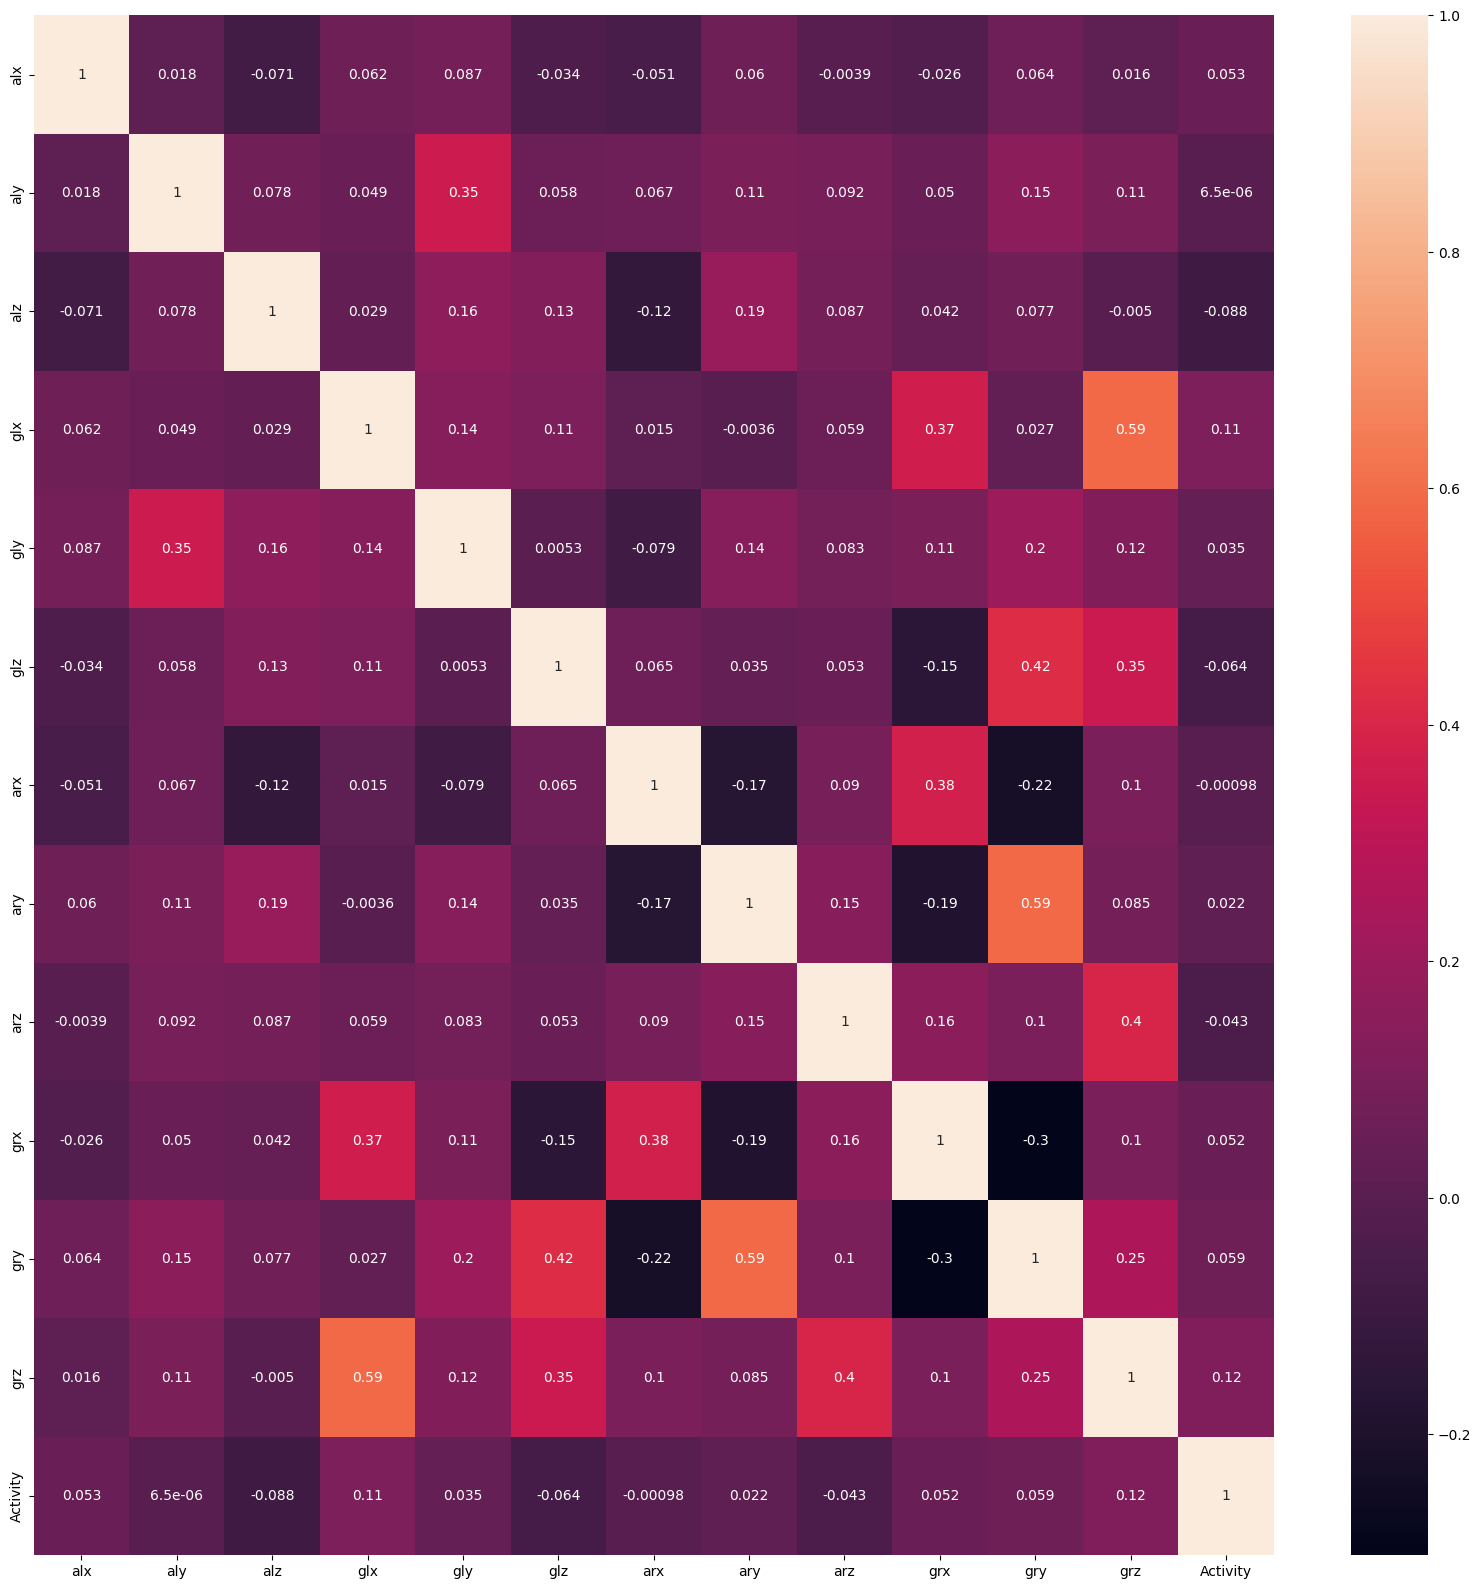

In [ ]:
plt.figure(figsize=(20, 20))
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()

In [ ]:
data=data.iloc[0:100000,:]
data.drop(columns=['subject'],inplace=True)
data.dropna(inplace=True)

<ipython-input-4-fbd533c061f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['subject'],inplace=True)
<ipython-input-4-fbd533c061f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
X = data[data.columns[0:11]]
y = data.iloc[:, -1]
shuffle_x=X.sample(frac=1,random_state=1)
shuffle_y=y.sample(frac=1,random_state=1)
X_train, X_test, y_train, y_test = train_test_split(shuffle_x, shuffle_y, test_size=0.1, shuffle=True, random_state=0)

In [ ]:
data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0.0
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0.0
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0.0
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0.0
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0.0


KNN"accuracy , precision , recall , F1-score and confusion matrix"

In [ ]:
data = pd.read_csv("/content/mhealth_raw_data.csv")

In [ ]:
X = data[data.columns[0:11]]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=0)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#4 knn (KNN Step 1 (Euclidean Distance between each point in x_train data and single x_test point)
def euclidean_distance(x_train_data, x_test_point):
    distances = []
    for i in range(len(x_train_data)):
        train_point = x_train_data[i]
        curr_distance = 0

        for j in range(len(train_point)):
            curr_distance += (train_point[j] - x_test_point[j])**2

        curr_distance = np.sqrt(curr_distance)
        distances.append(curr_distance)
    return distances

In [ ]:
#KNN Step 2 (Find k nearest neighbors)
def nearest_neighbors(distance, K):
    nearest = pd.DataFrame(distance).sort_values(by=['dist'])[:K]
    return nearest

In [ ]:
#KNN Step 3 (Classify the point based on a majority vote)
def classify_by_vote(nearest_neighbors, y_train):
    neighbor_labels = y_train[nearest_neighbors.index]
    prediction = Counter(neighbor_labels).most_common()[0][0]
    return prediction

In [ ]:
#KNN Full Algo Everything Together
def knn_predict(x_train_data, y_train, x_test_data, k):
    predictions = []

    for test_point in x_test_data:
        distance = euclidean_distance(x_train_data, test_point)
        nearest_neighbors = nearest_neighbors(distance, k)
        prediction = classify_by_vote(nearest_neighbors, y_train)
        predictions.append(prediction)

    return predictions


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
scaler = Normalizer().fit(X_train_imputed)
X_train_norm = scaler.transform(X_train_imputed)
X_test_norm = scaler.transform(X_test_imputed)

print('X train before Imputation:')
print(X_train[0:7])
print('\nX train after Imputation and Normalization:')
print(X_train_norm[0:7])
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

X train before Imputation:
[[ 9.3643e-01 -3.1433e+00 -5.4186e+00  6.7161e-01 -7.0356e-01 -3.9293e-03
   1.7522e+00 -3.2964e-01 -9.6440e-01 -5.4118e-01 -1.2115e-01]
 [-2.0944e+00 -1.8488e+01  2.6797e+00 -5.6772e-01 -5.2533e-01 -8.4676e-01
  -9.1655e+00  9.6397e+00  4.9716e+00 -9.4902e-01  3.2649e-01]
 [ 2.5167e+00 -6.3523e+00  4.1589e-01 -2.8200e-01 -4.6904e-01 -9.6857e-01
   7.8555e-01 -9.6131e+00 -2.3140e+00  3.5294e-02 -8.4805e-01]
 [ 6.1965e-01  8.1000e-01  9.7134e+00  8.3488e-02  9.5872e-01  8.1336e-01
  -6.0357e-01  5.2836e+00  8.3579e+00  6.3137e-01  4.3326e-01]
 [ 2.7574e+00 -7.4181e+00 -6.1662e+00 -1.6698e-02 -9.1932e-01 -1.2770e-01
  -5.5833e+00 -2.1019e+00  7.8116e+00 -7.0000e-01  7.4538e-01]
 [ 5.4484e+00 -7.8204e+00 -4.8157e+00  1.4842e-01 -5.6285e-01 -7.9568e-01
  -4.8254e+00 -8.2839e+00  3.6066e+00 -2.0392e-01 -1.2485e+00]
 [-8.1761e-01 -1.9113e+01  1.3411e+01  4.1929e-01 -8.1614e-01 -4.8527e-01
  -4.0003e+00  9.6214e+00 -8.6268e-01 -9.4706e-01 -5.5441e-02]]

X train afte

In [ ]:
# Define the value of k
k_values = [3, 5, 7]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_norm, y_train_encoded)
    y_pred = knn.predict(X_test_norm)

    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='macro')
    recall = recall_score(y_test_encoded, y_pred, average='macro')
    f1 = f1_score(y_test_encoded, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    print(f'\nMetrics for KNN with k={k}:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_matrix}')


Metrics for KNN with k=3:
Accuracy: 0.7515
Precision: 0.7560
Recall: 0.7447
F1 Score: 0.7480
Confusion Matrix:
[[13574  1030   653   354   534]
 [ 1243 10447   493   392   399]
 [ 1523  1163  7879  1201   515]
 [  994   927  1393  7928   413]
 [ 1081   725   571   331  8369]]

Metrics for KNN with k=5:
Accuracy: 0.7534
Precision: 0.7533
Recall: 0.7470
F1 Score: 0.7490
Confusion Matrix:
[[13459  1037   694   388   567]
 [ 1050 10491   579   426   428]
 [ 1237  1104  8041  1312   587]
 [  757   878  1634  7947   439]
 [  934   681   664   420  8378]]

Metrics for KNN with k=7:
Accuracy: 0.7521
Precision: 0.7519
Recall: 0.7461
F1 Score: 0.7477
Confusion Matrix:
[[13388  1046   701   384   626]
 [ 1045 10495   564   419   451]
 [ 1252  1147  7961  1276   645]
 [  775   903  1589  7929   459]
 [  950   656   623   387  8461]]


SVM

In [ ]:
data = pd.read_csv("/content/mhealth_raw_data.csv")

In [ ]:
X = data[data.columns[0:11]]
y = data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=0)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf1 = SVC(C=0.5, kernel='linear', cache_size=700)
clf2 = SVC(C=5, kernel='linear', cache_size=700)
clf3 = SVC(C=0.5, kernel='poly', degree=3, gamma='scale', cache_size=700)
clf4 = SVC(C=5, kernel='poly', degree=3, gamma='scale', cache_size=700)

# clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
# clf2 = SVC(C=5, kernel='rbf', gamma = 5)
# clf3 = SVC(C=0.5, kernel='poly', gamma = 5)
# clf4 = SVC(C=5, kernel='poly', gamma = 0.5)

clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)
clf4.fit(x_train, y_train)



for clf in [clf1, clf2, clf3, clf4]:
  predictions = clf.predict(x_test)
  print('\n')
  print(f'The Accuracy of the {clf} classifier is', accuracy_score(predictions, y_test))

MSE

In [ ]:
#mean squared error
mhealth_df= pd.read_csv("/content/mhealth_raw_data.csv")
mhealth_df.drop(columns=['subject'],inplace=True)
mhealth_df['Activity'] = mhealth_df['Activity'].apply(lambda x: 1 if x == 0 else -1)
class_I = mhealth_df[mhealth_df['Activity'] == 1]
class_II = mhealth_df[mhealth_df['Activity'] == -1]
class_I_Train, class_I_Test = train_test_split(class_I, test_size=0.2, random_state=0)
class_II_Train, class_II_Test = train_test_split(class_II, test_size=0.2, random_state=0)
X_train = np.concatenate((class_I_Train.iloc[:, :-1].values, class_II_Train.iloc[:, :-1].values))
Y_train = np.concatenate((class_I_Train['Activity'].values, class_II_Train['Activity'].values))
X_test = np.concatenate((class_I_Test.iloc[:, :-1].values, class_II_Test.iloc[:, :-1].values))
Y_test = np.concatenate((class_I_Test['Activity'].values, class_II_Test['Activity'].values))

x_augmented = np.c_[np.ones(X_train.shape[0]), X_train]
x_transpose = x_augmented.T
x_transpose_x = np.dot(x_transpose, x_augmented)
x_transpose_x_inv = np.linalg.inv(x_transpose_x)
x_transpose_y = np.dot(x_transpose, Y_train)
w = np.dot(x_transpose_x_inv, x_transpose_y)


def predict(x):
    return np.sign(np.dot(x, w[1:]) + w[0])
Y_pred = predict(X_test)

for i in range(len(Y_pred)):
    print(f'Predicted: {int(Y_pred[i])}, Actual: {Y_test[i]}')

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')


Streaming output truncated to the last 5000 lines.
Predicted: 1, Actual: -1
Predicted: -1, Actual: -1
Predicted: -1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: -1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: -1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: -1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: -1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actual: -1
Predicted: 1, Actu

SVM ""accuracy , precision , recall , F1-score "

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
data = pd.read_csv("/content/mhealth_raw_data.csv")
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
clf1 = SVC(C=0.5, kernel='linear', cache_size=700)
clf2 = SVC(C=5, kernel='linear', cache_size=700)
clf3 = SVC(C=0.5, kernel='poly', degree=3, gamma='scale', cache_size=700)
clf4 = SVC(C=5, kernel='poly', degree=3, gamma='scale', cache_size=700)

for clf in [clf1, clf2, clf3, clf4]:
    clf.fit(x_train_scaled, y_train)

def print_evaluation_metrics(clf, x_test_scaled, y_test):
    predictions = clf.predict(x_test_scaled)
    print(f'\nClassifier: {clf}')
    print(f'Accuracy: {accuracy_score(y_test, predictions):.4f}')
    print(f'Precision: {precision_score(y_test, predictions, average="macro"):.4f}')
    print(f'Recall: {recall_score(y_test, predictions, average="macro"):.4f}')
    print(f'F1-Score: {f1_score(y_test, predictions, average="macro"):.4f}')
    print(f'Confusion Matrix:\n{conf_matrix(y_test, predictions, average="macro"):.4f}')
for clf in [clf1, clf2, clf3, clf4]:
    print_evaluation_metrics(clf, x_test_scaled, y_test)


Classifier: SVC(C=0.5, cache_size=700, kernel='linear')
Accuracy: 0.8850
Precision: 0.8833
Recall: 0.8841
F1-Score: 0.8837

Classifier: SVC(C=5, cache_size=700, kernel='linear')
Accuracy: 0.8850
Precision: 0.8833
Recall: 0.8841
F1-Score: 0.8837

Classifier: SVC(C=0.5, cache_size=700, kernel='poly')
Accuracy: 0.8800
Precision: 0.8785
Recall: 0.8785
F1-Score: 0.8785

Classifier: SVC(C=5, cache_size=700, kernel='poly')
Accuracy: 0.8700
Precision: 0.8680
Recall: 0.8695
F1-Score: 0.8687


In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
data = pd.read_csv("/content/mhealth_raw_data.csv")
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf1 = SVC(C=0.5, kernel='linear', cache_size=700)
clf2 = SVC(C=5, kernel='linear', cache_size=700)
clf3 = SVC(C=0.5, kernel='poly', degree=3, gamma='scale', cache_size=700)
clf4 = SVC(C=5, kernel='poly', degree=3, gamma='scale', cache_size=700)

for clf in [clf1, clf2, clf3, clf4]:
    clf.fit(x_train_scaled, y_train)

def print_evaluation_metrics(clf, x_test_scaled, y_test):
    predictions = clf.predict(x_test_scaled)
    print(f'\nClassifier: {clf}')
    print(f'Accuracy: {accuracy_score(y_test, predictions):.4f}')
    print(f'Precision: {precision_score(y_test, predictions, average="macro"):.4f}')
    print(f'Recall: {recall_score(y_test, predictions, average="macro"):.4f}')
    print(f'F1-Score: {f1_score(y_test, predictions, average="macro"):.4f}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, predictions)}')

for clf in [clf1, clf2, clf3, clf4]:
    print_evaluation_metrics(clf, x_test_scaled, y_test)



Classifier: SVC(C=0.5, cache_size=700, kernel='linear')
Accuracy: 0.8850
Precision: 0.8833
Recall: 0.8841
F1-Score: 0.8837
Confusion Matrix:
[[99 12]
 [11 78]]

Classifier: SVC(C=5, cache_size=700, kernel='linear')
Accuracy: 0.8850
Precision: 0.8833
Recall: 0.8841
F1-Score: 0.8837
Confusion Matrix:
[[99 12]
 [11 78]]

Classifier: SVC(C=0.5, cache_size=700, kernel='poly')
Accuracy: 0.8800
Precision: 0.8785
Recall: 0.8785
F1-Score: 0.8785
Confusion Matrix:
[[99 12]
 [12 77]]

Classifier: SVC(C=5, cache_size=700, kernel='poly')
Accuracy: 0.8700
Precision: 0.8680
Recall: 0.8695
F1-Score: 0.8687
Confusion Matrix:
[[97 14]
 [12 77]]


Logistic regression

"accuracy , precision , recall , F1-score and confusion matrix"



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = data[data.columns[0:11]]
y = data.iloc[:, -1]
shuffle_x=X.sample(frac=1,random_state=1)
shuffle_y=y.sample(frac=1,random_state=1)
X_train, X_test, y_train, y_test = train_test_split(shuffle_x, shuffle_y, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
#Logistic regression model
LGmodel = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
LGmodel.fit(X_train, y_train)
LG_pred = LGmodel.predict(X_test)
print("Accuracy = ", (LGmodel.score(X_test, y_test)))
accuracy = accuracy_score(y_test, LG_pred)
precision = precision_score(y_test, LG_pred, average='weighted')
recall = recall_score(y_test, LG_pred, average='weighted')
f1 = f1_score(y_test, LG_pred,average='weighted')
conf_matrix = confusion_matrix(y_test, LG_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy =  0.7421317666806546
Accuracy: 0.7421
Precision: 0.6651
Recall: 0.7421
F1 Score: 0.6972
Confusion Matrix:
[[2319  105  333  160]
 [ 631    0    0    0]
 [   0    0  598    0]
 [   0    0    0  620]]


NN "accuracy , precision , recall , F1-score and confusion matrix"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
data = pd.read_csv("/content/mhealth_raw_data.csv")
data.drop('subject', axis=1, inplace=True)
X = data.drop(columns='Activity', axis=1)
y = data['Activity']
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=1)

model = Sequential([
    Dense(12, activation='relu', input_shape=(12,)),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer=SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
                 batch_size=64, epochs=5,
                 validation_data=(X_val, y_val), verbose=1)


evaluation = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')


Epoch 1/5
13298/13298 [==============================] - 32s 2ms/step - loss: nan - accuracy: 0.7049 - val_loss: nan - val_accuracy: 0.7186
Epoch 2/5
13298/13298 [==============================] - 33s 2ms/step - loss: nan - accuracy: 0.7175 - val_loss: nan - val_accuracy: 0.7186
Epoch 3/5
13298/13298 [==============================] - 34s 3ms/step - loss: nan - accuracy: 0.7175 - val_loss: nan - val_accuracy: 0.7186
Epoch 4/5
13298/13298 [==============================] - 34s 3ms/step - loss: nan - accuracy: 0.7175 - val_loss: nan - val_accuracy: 0.7186
Epoch 5/5
5699/5699 [==============================] - 7s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.0552
Recall: 0.0769
F1 Score: 0.0643
Confusion Matrix:
[[130941      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  4632      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  4606      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  4658      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  4676      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  4536      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  4215      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  4362      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  4479      0      0      0      0      0      0      0      0      0
       0      0      0]
 [  4608      0      0      0      0      0      0      0      0    

Cross validation
"k-fold"

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
import numpy as np
mhealth_data = pd.read_csv("/content/mhealth_raw_data.csv")
X_cols = ['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx', 'gry', 'grz']
y_col = 'Activity'
X = mhealth_data[X_cols].values
y = mhealth_data[y_col].values.reshape(-1, 1)
imputer_features = SimpleImputer(strategy='mean')
X_imputed = imputer_features.fit_transform(X)

imputer_target = SimpleImputer(strategy='mean')
y_imputed = imputer_target.fit_transform(y)
kfold = KFold(n_splits=10, random_state=None, shuffle=False)

for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)
    lm = LinearRegression()
    mse_scores = []
    for train_index, test_index in kfold.split(X_imputed):
        X_train, X_test = X_imputed[train_index], X_imputed[test_index]
        y_train, y_test = y_imputed[train_index], y_imputed[test_index]
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        lm.fit(X_train_poly, y_train)
        y_pred = lm.predict(X_test_poly)
        mse = np.mean((y_pred - y_test) ** 2)
        mse_scores.append(mse)

    print(f"Degree-{i} polynomial MSE: {np.mean(mse_scores):.2f}, STD: {np.std(mse_scores):.2f}")


Degree-1 polynomial MSE: 10.55, STD: 3.11
Degree-2 polynomial MSE: 29.80, STD: 62.76
